# Setup 

In [43]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
DAY_NAMES = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']

In [34]:
dataset = './dataset.csv'
df = pd.read_csv(dataset, sep=',', encoding='utf-8').drop({'Unnamed: 0'}, axis=1)

In [35]:
df['weekday'] = pd.DatetimeIndex(df.date).weekday

Descripción de las variables
- “userid”: Identificador único del browser de navegación.
- “Date”: Fecha (YYYY-MM-DD) de la sesión actual
- “cant_actions”: Cantidad de eventos del usuario en la sesión previa
- “search”: Cantidad de eventos de búsqueda de la sesión previa
- “detail”: Cantidad de eventos de detalle de la sesión previa
- “checkout”: Cantidad de eventos de checkout de la sesión previa
- “thanks”: Cantidad de eventos de compra de la sesión previa
- “comprador”: Es la variable que queremos predecir, si compró o no algún hotel.
- “comprador_sess”: Si compró un hotel en la sesión previa
- “used_tablet”: Si el dispositivo usado es una tablet
- “used_smartphone”: Si el dispositivo usado es un celular
- “timeprox”: Distancia en milisegundos entre la sesión actual y la previa
- “longsess”: Duración en milisegundos de la sesión previa
- “cantsesiones”: Cantidad de sesiones previas a la actual en los últimos 15 días
- “dur_media”: Duración media (en segundos) de la estadía buscada en la sesión previa
- “ant_media”: Anticipación media (en segundos) entre la fecha de la sesión previa y las fechas de
check-in buscadas


# Exploración 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222989 entries, 0 to 222988
Data columns (total 16 columns):
userid             222881 non-null object
date               222989 non-null object
cant_actions       222989 non-null int64
search             222410 non-null float64
detail             222989 non-null int64
checkout           222989 non-null int64
thanks             222989 non-null int64
comprador          222989 non-null bool
comprador_sess     222989 non-null bool
used_tablet        222989 non-null object
used_smartphone    222859 non-null object
timeprox           222989 non-null int64
longsess           222989 non-null int64
cantsesiones       222989 non-null int64
dur_media          222989 non-null float64
ant_media          222989 non-null float64
dtypes: bool(2), float64(3), int64(7), object(4)
memory usage: 24.2+ MB


In [84]:
df.describe()

,cant_actions,search,detail,checkout,thanks,timeprox,longsess,cantsesiones,dur_media,ant_media,weekday
count,222989.000000,222410.000000,222989.000000,222989.000000,222989.000000,2.229890e+05,2.229890e+05,222989.000000,2.229890e+05,2.229890e+05,222989.000000
mean,4.908628,1.461913,1.677518,0.815453,0.017934,2.367240e+08,4.162719e+05,3.863612,2.745702e+05,4.054378e+06,2.731184
std,72.601781,16.327508,12.495094,44.352587,0.146492,3.153581e+08,8.336248e+05,7.140104,2.487166e+05,5.848464e+06,1.972086
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.800037e+06,0.000000e+00,1.000000,0.000000e+00,-2.099175e+08,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.217785e+07,0.000000e+00,1.000000,8.640000e+04,2.608357e+05,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,8.435179e+07,6.251500e+04,2.000000,2.592000e+05,1.773552e+06,3.000000
75%,5.000000,2.000000,2.000000,1.000000,0.000000,3.458784e+08,4.468240e+05,4.000000,3.456000e+05,5.625098e+06,4.000000
max,19664.000000,4560.000000,3330.000000,11774.000000,9.000000,1.295984e+09,2.867021e+07,125.000000,7.430400e+06,4.722639e+07,6.000000


## período

In [62]:
'inicio: {}, fin: {}'.format(df.date.min(),df.date.max())

'inicio: 2018-05-14, fin: 2018-06-12'

## total de sesiones por día de la semana 

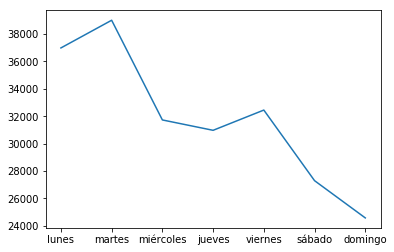

In [45]:
df.weekday.value_counts(sort=False).sort_index().plot()
plt.xticks(ticks=np.arange(7),labels=DAY_NAMES);

## usuarios

In [51]:
df.userid.nunique()

98397

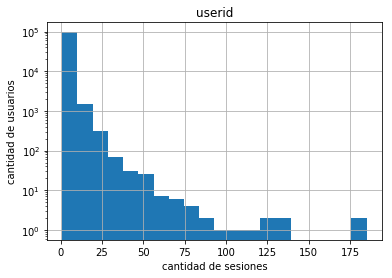

In [105]:
df.userid.value_counts().to_frame().hist(bins=20);
plt.yscale('log')
plt.xlabel('cantidad de sesiones')
plt.ylabel('cantidad de usuarios');

## dispositivo

In [92]:
# smartphone - full data 
df.used_smartphone.isna().sum() == 0

False

In [94]:
# tablet - full data 
df.used_tablet.isna().sum() == 0

True

In [88]:
# device True state integrity
((df.used_tablet == True) & (df.used_smartphone == True)).sum() == 0


True

In [104]:
# pc users
r, c = df.shape

r == (df.used_tablet.value_counts()[1] + df.used_smartphone.value_counts()[0])

False

# Limpieza

# Análisis 

# Probabilidad de compra

## ¿En qué día de navegación es más probable que compre?

## ¿Cómo cambia la probabilidad de compra cuando cambian la cantidad de acciones?

## ¿Si tuviera que quedarse con 2 variables, cuáles son las más importantes? 

## ¿Cómo mediría el ajuste del modelo? 

## ¿Qué momento elegiría para hacer una oferta de precio? (con qué cantidad de días-acciones-etc.).

# Reglas para dar descuentos 

# Anexos 